# Информация Фишера и оценка Рао-Крамера дисперсии эффективной оценки
---


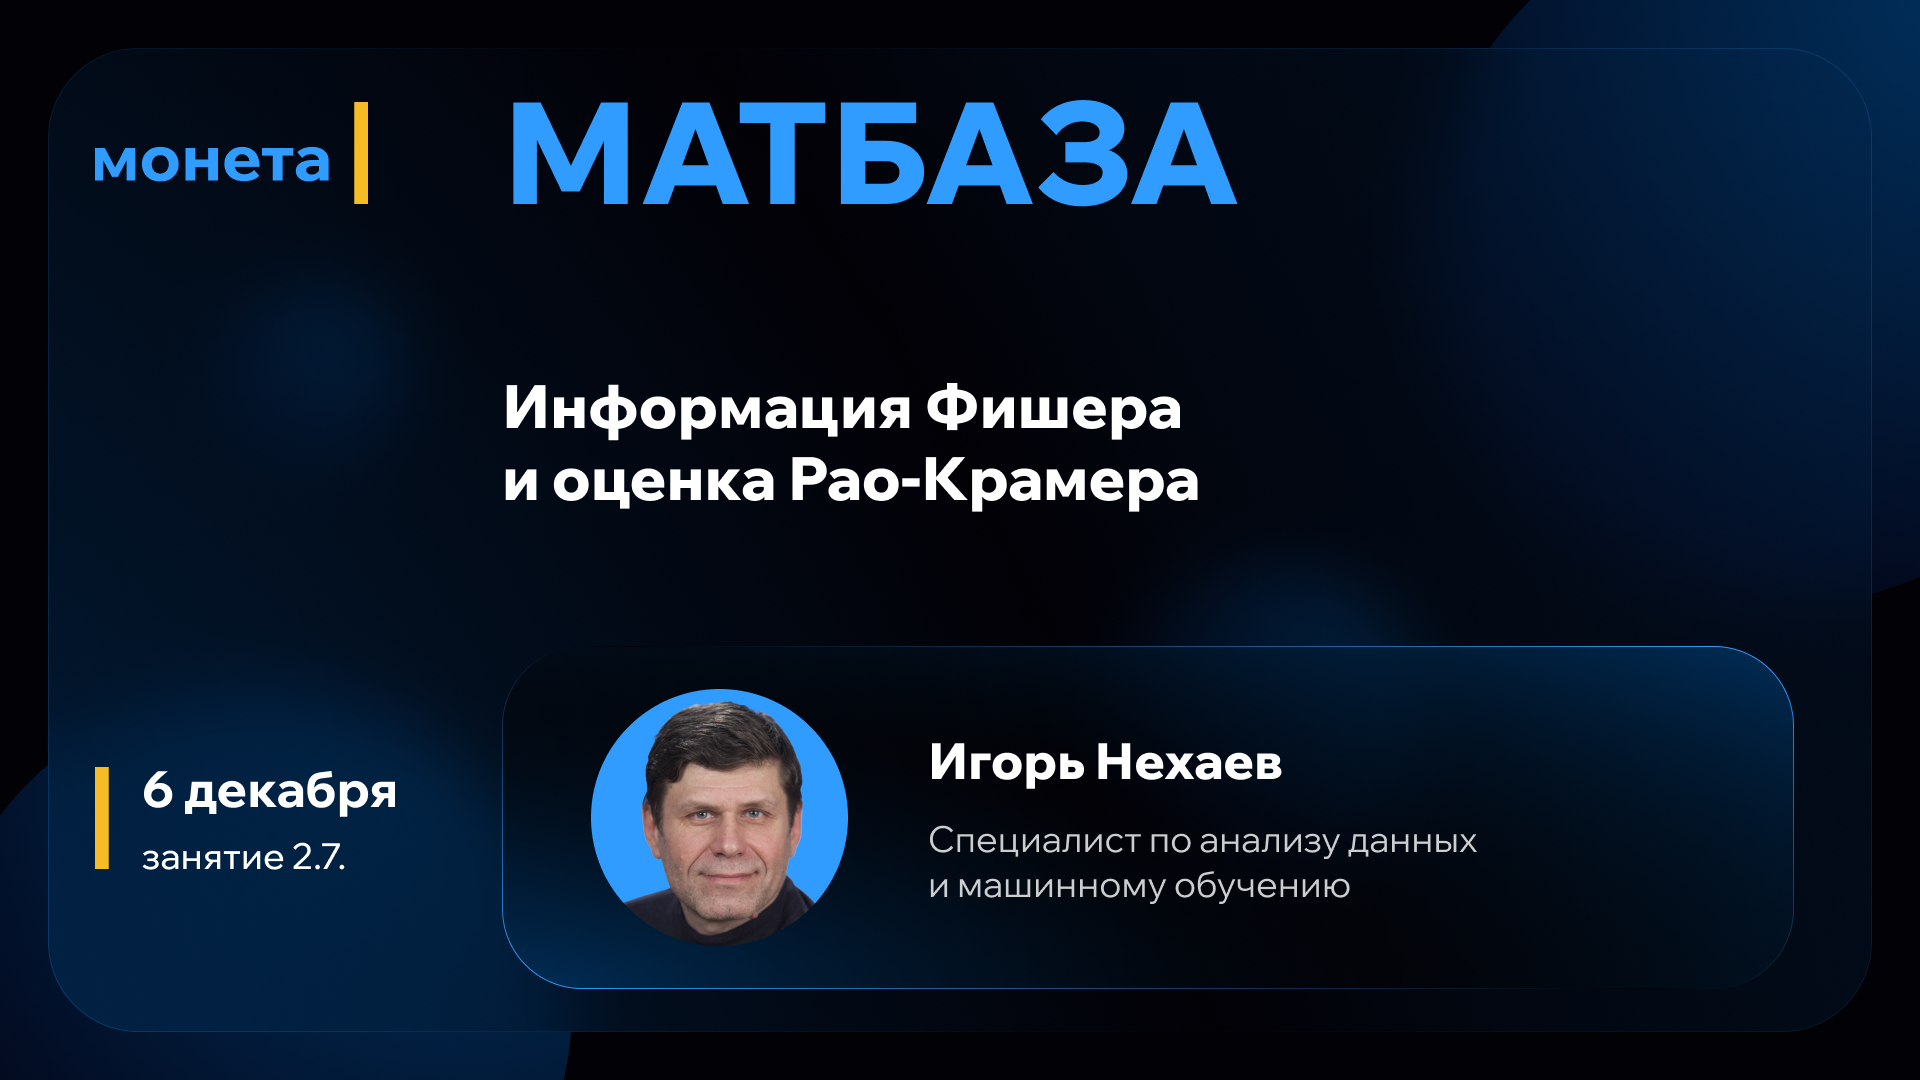

> - Информация Фишера как ценность одного наблюдения при оценке параметра распределения
> - Вывод информации Фишера при оценке параметров распределений ДСВ и НСВ
> - Нижняя граница Рао-Крамера для дисперсии оценки параметра распределения
> - Проверка эффективности для оценок $M_X \; и \; D_X$

In [ ]:
# подгружаем нужные библиотеки и устанавливаем нужные значения параметров
import numpy as np
np.set_printoptions(precision=3)
from scipy import stats
import matplotlib.pyplot as plt
plt.style.use('ggplot')

## **Информация Фишера**
---
Если про $\log L(Θ | \bar X)$ мы ничего не знаем, то вот про производную по $Θ$ в самом оптимальном случае мы можем сформулировать утверждение (см. https://en.wikipedia.org/wiki/Fisher_information)

Итак, пусть у нас есть СВ **X**, которая подчиняется некоторому закону распределения с параметром $Θ$ и плотностью $f_X(x, Θ)$ или функцией вероятности $p_θ(x)$.

Пусть мы построили для данного параметра $θ$ функцию правдоподобия $L(θ | x)$

Информация Фишера (не путать с кол-вом информации по Шеннону) - это некоторый способ оценки информации, которую дает нам наблюдение СВ X, относительно неизвестного параметра $\theta$.

Если $L$ резко меняется с изменением параметра $\theta$, то должно быть легко обнаружить "истинное" значение параметра $\theta$ по имеющимся наблюдениям, или по-другому, данные $X$ обеспечивают нас значительной информацией о значении параметра $\theta$.

Если же $L$ является плоской и растянутой, тогда нам потребуется значительно большая выборка значений X для оценки "истинного" значения параметра $\theta$. Т.е. одно наблюдение даст нам меньше информации в этом случае.

----

**Опр**. Частная производная по $\theta$ натурального логарифма функции правдоподобия называется **оценкой** (score):

- для одного наблюдения СВ X:
$$score(x, \Theta) = \frac {∂}{∂Θ} {\log L(\Theta | x)} = \frac {∂}{∂Θ}f_X(x, Θ)$$

- для выборки:
$$score(\bar X, \Theta) = \frac {∂}{∂Θ} {\log L(\Theta | \bar X)} = \frac {∂}{∂Θ} {\log ∏_{i=1}^n {f_X(x_i, Θ)}} = \sum_{i=1}^n \frac {∂}{∂Θ} \log {f_X(x_i, Θ)}$$

Вычислим мат.ожидание для $score$ (одно наблюдение):

$$M[score(X, \Theta)| Θ] = \int_ℜ \frac {∂}{∂Θ} {\log L(x, \Theta)} \cdot f_X(x, \Theta) dx = \int_ℜ \frac {\frac {∂}{∂Θ} {f_X(x, \Theta)}}{f_X(x, \Theta)} \cdot f_X(x, \Theta) dx$$

$$M[score(X, \Theta)| Θ] = \int_ℜ \frac {∂}{∂Θ} {f_X(x, \Theta)} dx = \frac {∂}{∂Θ} \int_ℜ {f_X(x, \Theta)} dx = \frac {∂}{∂Θ} 1 = 0$$

Это означает, что при истинном значении параметра $θ$ мат.ожидание функции правдоподобия имеет экстремальное значение (максимум), а оценка = 0.

---

Опр. **Информация Фишера** определяется как дисперсия $score$ для одного наблюдения:

$$𝓕(\Theta) = D[score(X, \Theta)| X \in f_X(x, Θ)] = D[score(X, \Theta)| Θ]$$

Так как $M[score] = 0$, то
$$D[score] = M[score^2] - M^2[score] = M[score^2]$$

или

$$𝓕(\Theta) = M[score^2(X, \Theta)| Θ] = \int_ℜ (\frac {∂}{∂Θ} {\log f_X(x, \Theta)})^2 \cdot f_X(x, \Theta) dx$$

-----

**Свойства информации Фишера.**

1. Так как информация Фишера - это дисперсия или мат.ожидание, то она не является случайной величиной. Это просто число: $𝓕(\Theta) \in ℜ$

2. $𝓕(\Theta) \ge 0, \; \forall Θ$

3. $𝓕(\Theta) = - M[\frac {∂^2}{∂Θ^2} {\log f_X(x, \Theta)} | Θ]$

т.е. 2-е и 3-е свойство сообщают нам следующее:
> если МО первой производной от логарифма функции правдоподобия при $\hat Θ = Θ$ равна 0, то вторая производная от этой функции при $\hat Θ = Θ$ меньше нуля и это означает, что при при $\hat Θ = Θ$ функция правдоподобия имеет точку максимума!

И еще один вывод можно сделать, что **информация Фишера** характеризует **кривизну** графика кривой для $y = M[\log L(Θ | X)]$ вблизи оценки максимального правдоподобия.

Если информация Фишера (кривизна) мала, то это означает "плоский" максимум, иначе - "крутой" максимум.

Т.е., по идее, высокое значение информации Фишера говорит нам о том, что одно наблюдение дает нам много информации относительно параметра распределения $Θ$. Это означает, что распределение СВ X должно иметь ярко выраженную моду и небольшую дисперсию.


### ЗАДАНИЕ
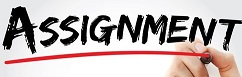

---
Для выведенных ниже плотностей распределения расставьте их в порядке возрастания информации Фишера  $𝓕(m_X)$:

1. A, B, C
2. A, C, B
3. C, A, B
4. C, B, A

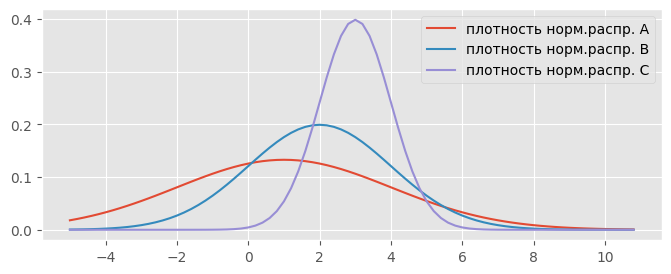

## Вычисление информации Фишера для ДСВ, распределенной по закону Бернулли
---

Рассмотрим СВ X, распределенную по закону Бернулли с параметром p, т.е.

$$p(x) =
  \begin{cases}
    p       & \quad  x = 1\\
    1-p     & \quad  x = 0
  \end{cases}
$$

Оценим информацию Фишера для одного наблюдения.

1. Функция правдоподобия:
$$L(X, p) = p^X \cdot (1 - p)^{1-X}$$

2. Натуральный логарифм функции правдоподобия:
$$\ln L(X, p) = X \ln p + (1 - X) \ln (1-p)$$

3. Частная производная по $p$:
$$\frac {∂}{∂p} \ln L(X, p) = \frac {X}{p} - \frac {1 - X}{1 - p}$$

3. Вторая частная производная по $p$:
$$\frac {∂^2}{∂p^2} \ln L(X, p) = - \frac {X}{p^2} - \frac {1 - X}{(1 - p)^2}$$

4. Информация Фишера:
$$ℱ(p) = - M[\frac {∂^2}{∂p^2} \ln L(X, p) | p] = M[\frac {X}{p^2}] + M[\frac {1 - X}{(1 - p)^2}] = \frac {p}{p^2} + \frac {1 - p}{(1 - p)^2} = \frac {1}{p} + \frac {1}{1 - p} = \frac {1}{p(1 - p)}$$


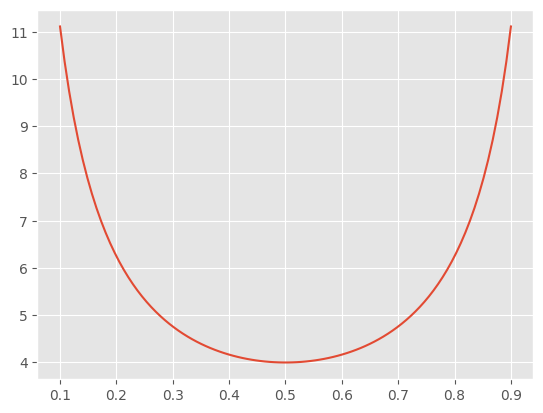

In [ ]:
p_i = np.linspace(0.1, 0.9, 100)
f_i = np.array([1/p/(1-p) for p in p_i])
plt.plot(p_i, f_i);

## Вычисление информации Фишера для нормально распределенной НСВ
---

Рассмотрим СВ $X \in N(0, σ)$ (нормальный закон со средним = 0 и СКО = $σ$)

Оценим информацию Фишера для одного наблюдения.

1. Функция правдоподобия  (плотность распределения):
$$ϕ(x, σ) = \frac {1}{\sqrt{2π}σ} e^{- \frac {X^2}{2σ^2}}$$

2. Натуральный логарифм функции правдоподобия:
$$\ln ϕ(x, σ) = -\frac {1}{2} \ln(2π) - \lnσ - \frac {X^2}{2σ^2}$$

3. Частная производная по $σ$:
$$\frac {∂}{∂σ} \ln ϕ(x, σ) = - \frac {1}{σ} + \frac {X^2}{σ^3}$$

4. Вторая частная производная по $σ$:
$$\frac {∂^2}{∂σ^2} \ln ϕ(x, σ)  = \frac {1}{σ^2} - 3 \frac {X^2}{σ^4}$$

5. Информация Фишера:
$$ℱ(σ) = - M[\frac {∂^2}{∂σ^2} \ln L(X, p) | p] = M[3 \frac {X^2}{σ^4}] - \frac {1}{σ^2} = \frac {3 \cdot M_{X^2}}{σ^4} - \frac {1}{σ^2} $$

так как $m_X = 0$, то $D_X = σ_X^2 = M_{X^2}$ и получаем:

$$ℱ(σ) = \frac {3}{σ^2} - \frac {1}{σ^2} = \frac {2}{σ^2}$$

Подтвердим данную зависимость вычислительно.



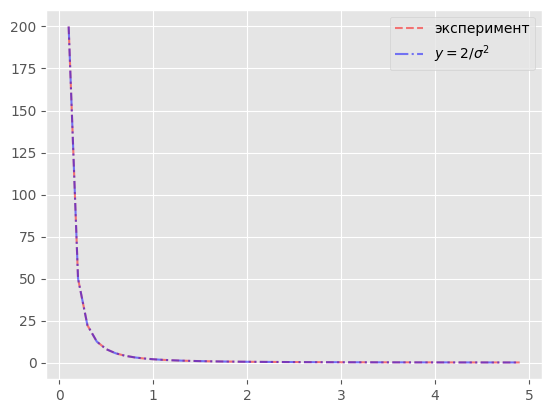

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')
from scipy import integrate
import scipy.stats as stat

def fisher_info(sigma, x_min = -20.0, x_max=20.0):
    norm_rv = stat.norm(loc=0, scale=sigma)
    d_logL = lambda x: ((x / sigma)**2 - 1) / sigma

    # зададим подинтегральные функции
    f = lambda x: norm_rv.pdf(x) * d_logL(x)**2

    # выполним интегрирование с помощью пакета
    info = round(integrate.quad(f, x_min, x_max)[0], 5)
    return info

sigma_min, sigma_max = 0.1, 5
sigmas = np.arange(sigma_min, sigma_max, 0.1)

fishers = [fisher_info(sigma) for sigma in sigmas]
plt.plot(sigmas, fishers, 'r--', label = 'эксперимент', alpha = 0.5)
plt.plot(sigmas, 2 / sigmas ** 2, 'b-.', label = '$y= 2/\sigma^2$', alpha = 0.5)
plt.legend()
plt.show()

### ЗАДАНИЕ
---
Выведем информацию Фишера для оценки параметра $Tcp$ для экспоненциально распределенной СВ

Рассмотрим СВ $X \in Exp(Tcp)$ (экспоненциальный закон со средним = $Tcp$)

> Функция правдоподобия  (плотность распределения):
$$L(T_{cp} | X) = \frac {1}{T_{cp}} e^{- \frac {X}{T_{cp}}}$$

> Натуральный логарифм функции правдоподобия:
$$\ln L(Tcp | X) = - \ln(Tcp) - \frac {X}{Tcp}$$

Выведите (или угадайте :)) информацию Фишера.

ВАРИАНТЫ ОТВЕТА:
1. $ℱ(T_{cp}) = \frac {2}{T_{cp}^2}$
1. $ℱ(T_{cp}) = \frac {1}{T_{cp}^2}$
1. $ℱ(T_{cp}) = T_{cp}^2$
1. $ℱ(T_{cp}) = \frac {T_{cp}^2}{2}$

## **Оценка Рао-Крамера**
---

Рассмотрим несмещенную оценку $\hat Θ(X)$ параметра $Θ$, т.е.

$$M[\hat Θ(X) - Θ | Θ] = \int (\hat Θ(x) - Θ) f_{X}(x, Θ) dx = 0, \; \forall Θ$$

Если независимо от значения $Θ$ это выражение равно 0, то и ее производная по $Θ$ также будет равна 0:

$$\frac {∂}{∂Θ} \int (\hat Θ(x) - Θ) f_{X}(x, Θ) dx = \int \frac {∂}{∂Θ} [(\hat Θ(x) - Θ) f_{X}(x, Θ)] dx = \int (\hat Θ(x) - Θ) \frac {∂}{∂Θ} f dx - \int f dx = 0$$

так как $\int f dx = 1$
и
$$\frac {∂}{∂Θ} f = f \frac {∂}{∂Θ} \log f, $$

то получим:

$$\int (\hat Θ(x) - Θ) f \frac {∂}{∂Θ}(\log f) dx = 1$$

Возведем левую и правую части в квадрат, выделим множители и, используя неравенство Коши-Шварца
$$(\int f(x) g(x) dx)^2 \le \int f^2(x) dx \cdot \int g^2(x) dx$$

получим:

$$1 = [\int (\hat Θ(x) - Θ) \cdot f \cdot \frac {∂}{∂Θ}(\log f) dx]^2 \le [\int (\hat Θ - Θ)^2 f dx] \cdot [\int (\frac {∂}{∂Θ}(\log f))^2 f dx] = D_{\hat Θ} \cdot ℱ(Θ)$$

отсюда следует оценка Рао-Крамера снизу для дисперсии $\hat Θ$:
$$D_{\hat Θ} \cdot ℱ(Θ) \ge 1$$
$$D_{\hat Θ} \ge \frac {1}{ℱ(Θ)}$$

Т.е. если для несмещенной оценки  $$D_{\hat Θ} = \frac {1}{ℱ(Θ)},$$

то это и есть самая эффективная оценка.


## Анализ эффективности оценки параметра $p$ для ДСВ, распределенной по закону Бернулли
---



Рассмотрим СВ X, распределенную по закону Бернулли с параметром p, т.е.

$$p(x) =
  \begin{cases}
    p       & \quad  x = 1\\
    1-p     & \quad  x = 0
  \end{cases}
$$

1. Информация Фишера:
$$ℱ(p) = \frac {1}{p(1 - p)}$$

2. Оценка Рао-Крамера:
$$D_{\hat p} \ge \frac {1}{ℱ(p)} = p(1 - p)$$

3. Найдем дисперсию для статистики $$\hat p = \frac {1}{n} \cdot \sum_{i=1}^n X_i = \frac {n_{успехов}}{n}$$

в случае одного наблюдения имеем:
$$\hat p = X$$
$$D_{\hat p} = D_X = M[X^2] - M[X]^2$$

$$M[X] = p \cdot 1 + (1 - p) \cdot 0 = p$$
$$M[X^2] = p \cdot 1^2 + (1 - p) \cdot 0^2 = p$$
то
$$D_X = p - p^2 = p (1 - p)$$

т.е.:

$$D_{\hat p} = p (1 - p)$$

Таким образом, оценка максимального правдоподобия
$$\hat p = \frac {1}{n} \cdot \sum_{i=1}^n X_i$$ является эффективной.

---


> **ЗАМЕЧАНИЕ**
Для выборки размером n информация Фишера возрастает в n раз:
$$ℱ(p, n) = \frac {n}{p(1 - p)}$$
при этом и дисперсия оценки
$$\hat p[n] = \frac {1}{n} \cdot \sum_{i=1}^n X_i$$
уменьшается в n раз:
$$D_{\hat p[n]} = \frac {p (1 - p)}{n}$$
поэтому нижняя граница оценки Рао-Крамера достигается и в случае $n > 1$:
$$D_{\hat p[n]} = \frac {1}{ℱ(p, n)} = \frac {p (1 - p)}{n}$$

---


## Анализ эффективности оценки дисперсии для нормально распределенной НСВ.
---


Рассмотрим СВ $X \in N(0, σ)$ (нормальный закон со средним = 0 и СКО = $σ$)

Найдем информацию Фишера для оценки дисперсии $D_X$

1. Функция правдоподобия  (плотность распределения):
$$L(σ | X) = ϕ(x, σ) = \frac {1}{\sqrt{2π}σ} e^{- \frac {(X - m)^2}{2σ^2}}$$
или
$$L(D_X | X) = ϕ(x, D_X) = \frac {1}{\sqrt{2πD_X}} e^{- \frac {X^2}{2D_X}}$$

2. Натуральный логарифм функции правдоподобия:
$$\ln ϕ(x, D_X) = -\frac {1}{2} \ln(2π) - \frac {1}{2} \ln D_X - \frac {X^2}{2D_X}$$

3. Частная производная по $D_X$:
$$\frac {∂}{∂D_X} \ln ϕ(x, D_X) = - \frac {1}{2D_X} + \frac {X^2}{2 D_X^2}$$

4. Вторая частная производная по $D_X$:
$$\frac {∂^2}{∂D_X^2} \ln ϕ(x, D_X)  = \frac {1}{2D_X^2} - \frac {X^2}{D_X^3}$$

5. Информация Фишера:
$$ℱ(D_X) = - M[\frac {∂^2}{∂D_X^2} \ln L(D_X |X)] = M[\frac {X^2}{D_X^3}] - \frac {1}{2D_X^2} = \frac {M_{X^2}}{D_X^3} - \frac {1}{2 D_X^2} $$
так как $m_X = 0$, то $D_X = σ_X^2 = M_{X^2}$ и получаем:
$$ℱ(D_X) = \frac {1}{D_X^2} - \frac {1}{2D_X^2} = \frac {1}{2D_X^2} = \frac {1}{2σ^4}$$

6. Оценка Рао-Крамера:
$$D_{\hat {D_X}} \ge \frac {1}{ℱ(D_X)} = 2 σ^4$$

7. Найдем дисперсию для статистики $$\hat {D_X} = \frac {1}{n} \cdot \sum_{i=1}^n X_i^2$$
при $n=1$

$$\hat {D_X} = X^2$$

Найдем ее мат.ожидание:
$$M[\hat {D_X}] = M[X^2] = \sigma^2$$

Найдем мат.ожидание ее квадрата:
$$M[({\hat {D_X}})^2] = m_{X^4} = 3 σ^4$$
(см. https://en.wikipedia.org/wiki/Normal_distribution#Symmetries_and_derivatives)

Найдем дисперсию:
$$D_{\hat {D_X}} = M[(\hat {D_X})^2] - M^2[\hat {D_X}] = 3σ^4 - σ^4 = 2 σ^4$$

Таким образом, оценка максимального правдоподобия
$$\hat {D_X} = \frac {1}{n} \cdot \sum_{i=1}^n (X_i - m_X)^2$$

является эффективной.

---

## Анализ эффективности оценки среднего для экспоненциально распределенной НСВ
---

Рассмотрим СВ $X \in Exp(Tcp)$ (нормальный закон со средним = $Tcp$)

Оценим информацию Фишера.

1. Функция правдоподобия  (плотность распределения):
$$L(T_{cp} | X) = \frac {1}{T_{cp}} e^{- \frac {X}{T_{cp}}}$$

2. Натуральный логарифм функции правдоподобия:
$$\ln L(Tcp | X) = - \ln(Tcp) - \frac {X}{Tcp}$$

3. Частная производная по $T_{cp}$:
$$\frac {∂}{∂T_{cp}} \ln L(T_{cp} | X) = - \frac {1}{T_{cp}} + \frac {X}{T_{cp}^2}$$

4. Вторая частная производная по $T_{cp}$:
$$\frac {∂^2}{∂T_{cp}^2} \ln L(T_{cp} | X)  = \frac {1}{T_{cp}^2} - 2 \frac {X}{T_{cp}^3}$$

5. Информация Фишера:
$$ℱ(T_{cp}) = - M[\frac {∂^2}{∂σ^2} \ln L(T_{cp} |X)] = M[2 \frac {X}{T_{cp}^3}] - \frac {1}{T_{cp}^2} = \frac {2 \cdot M_{X}}{T_{cp}^3} - \frac {1}{T_{cp}^2}$$

так как $m_X = Tcp$, то:

$$ℱ(T_{cp}) = \frac {2}{T_{cp}^2} - \frac {1}{T_{cp}^2} = \frac {1}{T_{cp}^2}$$

6. Оценка Рао-Крамера:
$$D_{\hat {T_{cp}}} \ge \frac {1}{ℱ(T_{cp})} = T_{cp}^2$$

7. Найдем дисперсию для статистики $$\hat {T_{cp}} = \frac {1}{n} \cdot \sum_{i=1}^n X_i$$
при $n=1$

$$\hat {T_{cp}} = X$$

Дисперсия для экспоненциально распределенной СВ:
$$D[X] = T_{cp}^2$$

Таким образом, оценка максимального правдоподобия
$$\hat {Tcp} = \frac {1}{n} \cdot \sum_{i=1}^n X_i$$

является эффективной.




## **Resume**
---
> информация Фишера - это дисперсия для производной от логарифма функции правдоподобия:
$$𝓕(\theta) = M[score^2(X, \theta)| Θ] = \int_ℜ (\frac {∂}{∂Θ} {\log L(\theta | x)})^2 \cdot f_X(x, \theta) dx$$
Она пропорциональна количеству информации, которое нам приносит одно наблюдение при данном значении параметра $θ$;

> дисперсия любой оценки параметра распределения не может быть меньше величины обратной к информации Фишера для этого параметра: $D_{\hat Θ} \ge \frac {1}{ℱ(Θ)}$; логично - чем больше информации приносит одно измерение, тем можно получить более эффективную оценку неизвестного параметра распределения;

> оценка $\hat p = \frac {1}{n} \cdot \sum_{i=1}^n X_i$, полученная методом максимального правдоподобия для ДСВ, распределенной по закону Бернулли, является эффективной, так как ее дисперсия при $n=1$ совпадает с минимально возможным значением $D_{\hat p} = \frac {1}{ℱ(p)} = p (1 - p)$;

> аналогично, выборочное среднее, оценка $\hat M_X = \frac {1}{n} \cdot \sum_{i=1}^n X_i$, полученная методом максимального правдоподобия для НСВ, нормально распределенной, также является эффективной;

> оценка $\hat D_X = \frac {1}{n} \cdot \sum_{i=1}^n (X_i - m_X)^2$, полученная методом максимального правдоподобия для НСВ, распределенной по нормальному закону $N(m, σ)$, является эффективной, так как ее дисперсия при $n=1$ совпадает с минимально возможным значением $D_{\hat D_X} = \frac {1}{ℱ(D_X)} = 2 \sigma^4$

